# Wasserstein Generative Adversarial Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10, cifar100

from src.model.WGAN import WGAN


2023-02-09 07:00:26.991444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 07:00:27.099594: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-09 07:00:27.102547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 07:00:27.102562: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

## Data

In [4]:
label='horses'

labels={
    'cars': 1,
    'horses': 7
}

In [5]:
def load_cifar_dataset(label, version):
    if version == 10:
        (x_train, y_train), (x_test, y_test)=cifar10.load_data()
    else:
        (x_train, y_train), (x_test, y_test)=cifar100.load_data(label_mode='fine')

    train_mask=[y[0]==label for y in y_train]
    test_mask=[y[0]==label for y in y_test]

    x_data=np.concatenate([x_train[train_mask], x_test[test_mask]])
    y_data=np.concatenate([y_train[train_mask], y_test[test_mask]])

    x_data=(x_data.astype('float32') - 127.5) / 127.5
 
    return (x_data, y_data)

In [6]:
(x_train, y_train)=load_cifar_dataset(labels[label], 10)

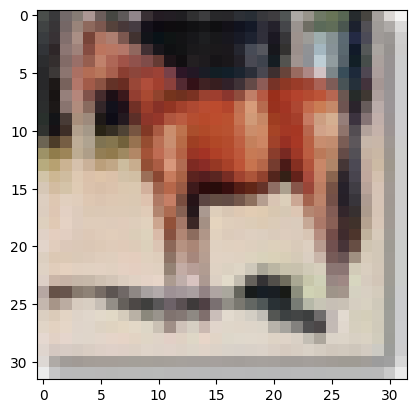

In [7]:
plt.imshow((x_train[200,:,:,:]+1)/2)

## WGAN Architecture

In [8]:
wgan = WGAN(input_dim=(32,32,3),
            critic_conv_filters=[32,64,128,128],
            critic_conv_kernel_size=[5,5,5,5],
            critic_conv_strides=[2,2,2,1],
            critic_batch_norm_momentum=None,
            critic_activation='leaky_relu',
            critic_dropout_rate=None,
            critic_learning_rate=0.00005,
            generator_initial_dense_layer_size=(4, 4, 128),
            generator_upsample=[2,2, 2,1],
            generator_conv_filters=[128,64,32,3],
            generator_conv_kernel_size=[5,5,5,5],
            generator_conv_strides=[1,1, 1,1],
            generator_batch_norm_momentum=0.8,
            generator_activation='leaky_relu',
            generator_dropout_rate=None,
            generator_learning_rate=0.00005,
            optimizer='rmsprop',
            z_dim=100,
)

2023-02-09 07:00:28.899172: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-09 07:00:28.899217: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-09 07:00:28.899233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2a93468b690c): /proc/driver/nvidia/version does not exist
2023-02-09 07:00:28.899430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
wgan.critic.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 critic_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 critic_conv0 (Conv2D)       (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 critic_conv1 (Conv2D)       (None, 8, 8, 64)          51264     
                                                                 
 activation_1 (Activation)   (None, 8, 8, 64)          0         
                                                                 
 critic_conv2 (Conv2D)       (None, 4, 4, 128)         204928    
                                                                 
 activation_2 (Activation)   (None, 4, 4, 128)         0     

In [10]:
wgan.generator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_input (InputLayer  [(None, 100)]            0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 2048)              206848    
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 activation_4 (Activation)   (None, 2048)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 128)        0   

## Train WGAN

In [11]:
BATCH_SIZE=128
EPOCHS=6000
PRINT_EVERY_N_BATCHES=50
N_CRITIC=5
CLIP_THRESHOLD=0.01

In [13]:
wgan.train(     
    x_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    print_every_n_batches=PRINT_EVERY_N_BATCHES,
    n_critic=N_CRITIC,
    clip_threshold=CLIP_THRESHOLD
)

4/4 [==============================] - 0s 26ms/step


2023-02-09 07:01:44.016 | INFO     | src.model.WGAN:train:272 - 50 [C loss: (-815.798)(R -1631.595, F 0.000)] [G loss: -6980.859]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:01:44           64
config.json                                    2023-02-09 07:01:44         5329
variables.h5                                   2023-02-09 07:01:44      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:03:08.398 | INFO     | src.model.WGAN:train:272 - 100 [C loss: (-1111.066)(R -2222.132, F 0.000)] [G loss: -9251.823]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:03:08           64
config.json                                    2023-02-09 07:03:08         5329
variables.h5                                   2023-02-09 07:03:08      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:04:56.437 | INFO     | src.model.WGAN:train:272 - 150 [C loss: (-1121.603)(R -2243.207, F 0.000)] [G loss: -9796.111]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:04:56           64
config.json                                    2023-02-09 07:04:56         5329
variables.h5                                   2023-02-09 07:04:56      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:06:42.667 | INFO     | src.model.WGAN:train:272 - 200 [C loss: (-1129.302)(R -2258.603, F 0.000)] [G loss: -10009.123]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:06:43           64
config.json                                    2023-02-09 07:06:43         5329
variables.h5                                   2023-02-09 07:06:43      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:08:27.193 | INFO     | src.model.WGAN:train:272 - 250 [C loss: (-1112.708)(R -2225.415, F 0.000)] [G loss: -10117.525]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:08:27           64
config.json                                    2023-02-09 07:08:27         5329
variables.h5                                   2023-02-09 07:08:27      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:10:18.496 | INFO     | src.model.WGAN:train:272 - 300 [C loss: (-1118.862)(R -2237.724, F 0.000)] [G loss: -10180.433]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:10:19           64
config.json                                    2023-02-09 07:10:19         5329
variables.h5                                   2023-02-09 07:10:19      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:12:02.717 | INFO     | src.model.WGAN:train:272 - 350 [C loss: (-1127.466)(R -2254.932, F 0.000)] [G loss: -10188.875]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:12:03           64
config.json                                    2023-02-09 07:12:03         5329
variables.h5                                   2023-02-09 07:12:03      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:13:57.233 | INFO     | src.model.WGAN:train:272 - 400 [C loss: (-1227.432)(R -2454.863, F 0.000)] [G loss: -10189.465]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:13:57           64
config.json                                    2023-02-09 07:13:57         5329
variables.h5                                   2023-02-09 07:13:57      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:16:08.440 | INFO     | src.model.WGAN:train:272 - 450 [C loss: (-1082.035)(R -2164.069, F 0.000)] [G loss: -10189.579]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:16:09           64
config.json                                    2023-02-09 07:16:09         5329
variables.h5                                   2023-02-09 07:16:09      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:18:12.591 | INFO     | src.model.WGAN:train:272 - 500 [C loss: (-1145.437)(R -2290.875, F 0.000)] [G loss: -10189.624]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:18:13           64
config.json                                    2023-02-09 07:18:13         5329
variables.h5                                   2023-02-09 07:18:13      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:20:07.601 | INFO     | src.model.WGAN:train:272 - 550 [C loss: (-1144.010)(R -2288.020, F 0.000)] [G loss: -10189.800]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:20:08           64
config.json                                    2023-02-09 07:20:08         5329
variables.h5                                   2023-02-09 07:20:08      2712624
Keras weights file (<HDF5 file "va

2023-02-09 07:21:55.581 | INFO     | src.model.WGAN:train:272 - 600 [C loss: (-1151.600)(R -2303.199, F 0.000)] [G loss: -10189.801]


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......dense
.........vars
............0
............1
......flatten
.........vars
......input_layer
.........vars
...metrics
......mean
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-09 07:21:56           64
config.json                                    2023-02-09 07:21:56         5329
variables.h5                                   2023-02-09 07:21:56      2712624
Keras weights file (<HDF5 file "va